In [140]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import torch.nn.functional as Fun
"""
1.定义一个类，这个类是你的模型，你定义的这个类的父类是（torch.nn.Module）,
至少，最好必须要有两个函数，构造函数_init_ 用来初始化你的对象和forward用来做前馈运算。
Module这个类已经默认自动帮你算反向传播过程了。你这个模型用到的是类是nn.Linear,这个类做的运算是y=Ax+b. bias就是b
2.代价函数是：mse(torch.nn.MSELoss)
3.优化器选择（optimizer）,随机梯度下降算法SGD（torch.optim.SGD）
4.搭配上你之前的数据生成器来完成模型的训练，利用之前x,y
5.总结来说就是：第一步算前馈过程的预测值；第二步算损失；第三步算backward，在算backward之间梯度清零；第四步，更新。
"""

class linear(nn.Module):
    
    # 定义网络层信息
    def __init__(self, input_dim):
        super(linear, self).__init__()
        self.line1 = nn.Linear(input_dim, 16)
        self.line2 = nn.Linear(16, 160)
        self.line3 = nn.Linear(160, 1)
    
    # 构建前向传播计算过程
    def forward(self, x):
        y = Fun.relu(self.line1(x))
        y = Fun.relu(self.line2(y))
        y = self.line3(y)
        return y

In [141]:
import numpy as np
from torch.utils.data import Dataset, DataLoader

class TensorDataset(Dataset):
	def __init__(self, x, y):
		self.x = x
		self.y = y

	def __getitem__(self, index):
		return self.x[index], self.y[index]

	def __len__(self):
		return len(self.x)

np.random.seed(123)
# x_data = torch.randn(100, 1)
# y_data = 2 * x_data + 15 + torch.randn(100, 1)
x_data = torch.Tensor([[i] for i in np.random.randint(1,100,200)])
y_data = 2 * x_data + torch.Tensor([[i] for i in np.random.randint(-20,20,200)])
tensor_dataset = TensorDataset(x_data, y_data)

tensor_dataloader = DataLoader(tensor_dataset,   # 封装的对象
                               batch_size=5,     # 输出的batch size
                               shuffle=False,     # 随机输出
                               num_workers=0)    # 只有1个进程

In [144]:
# 实例化一个类
net = linear(1) 

# 定义优化器
optimizer = optim.SGD(net.parameters(), lr=0.0000001)

# 定义损失函数
cost = nn.MSELoss()

# 开始训练
epochs = 100
lloss = []
for epoch in range(epochs):
    for (x_train, y_train) in tensor_dataloader:
        # 计算输出
        output = net(x_train)
        # 计算损失值
        loss = cost(output, y_train)
        # 清零梯度缓存
        optimizer.zero_grad()
        # 计算梯度
        loss.backward()
        # 更新参数
        optimizer.step()
        
    lloss.append(loss)
    print('epoch:', epoch, 'time loss:', loss)

epoch: 0 time loss: tensor(5955.8550, grad_fn=<MseLossBackward0>)
epoch: 1 time loss: tensor(4823.4961, grad_fn=<MseLossBackward0>)
epoch: 2 time loss: tensor(3849.8608, grad_fn=<MseLossBackward0>)
epoch: 3 time loss: tensor(3011.3545, grad_fn=<MseLossBackward0>)
epoch: 4 time loss: tensor(2300.9292, grad_fn=<MseLossBackward0>)
epoch: 5 time loss: tensor(1716.1321, grad_fn=<MseLossBackward0>)
epoch: 6 time loss: tensor(1250.7815, grad_fn=<MseLossBackward0>)
epoch: 7 time loss: tensor(894.9930, grad_fn=<MseLossBackward0>)
epoch: 8 time loss: tensor(633.9927, grad_fn=<MseLossBackward0>)
epoch: 9 time loss: tensor(450.2228, grad_fn=<MseLossBackward0>)
epoch: 10 time loss: tensor(325.8170, grad_fn=<MseLossBackward0>)
epoch: 11 time loss: tensor(244.6253, grad_fn=<MseLossBackward0>)
epoch: 12 time loss: tensor(193.3962, grad_fn=<MseLossBackward0>)
epoch: 13 time loss: tensor(162.0804, grad_fn=<MseLossBackward0>)
epoch: 14 time loss: tensor(143.5190, grad_fn=<MseLossBackward0>)
epoch: 15 tim

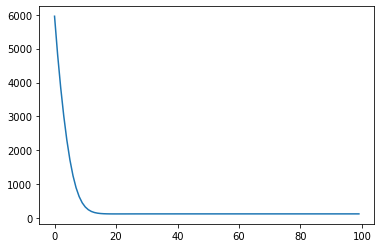

In [145]:
import matplotlib.pyplot as plt
plt.plot(range(len(lloss)), lloss)
plt.show()